In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import pickle
from sklearn.metrics import *
import pandas as pd

In [2]:
from dual_model_with_transfer import dual_model_sudden, dual_model_gradual
from single_model_with_transfer import model_sudden, model_gradual

In [46]:
# read fit values
fits_single = pickle.load(open('fit_single_quantiles.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_quantiles.pickle', 'rb'))
fits_single_model_recovery = pickle.load(open('params/fit_single_bound_with_transfer_model_recovery.pickle', 'rb'))
fits_dual_model_recovery = pickle.load(open('params/fit_dual_bound_with_transfer_model_recovery.pickle', 'rb'))

curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))
curvatures_smooth = curvatures_smooth/90.0
curvatures = pickle.load(open('curvatures.pickle', 'rb'))

In [63]:
def plot_data_vs_fits_dual(curvatures_smooth, Af, Bf, As, Bs):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_sudden(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_gradual(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 2))
    legend_size = 15
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(1 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10/90.0 - csm[i+1]
            cs[576:640] = 1 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Dual Model Predictions', fontsize = 20)
    return corr_coef


C:\Users\Tejas\Documents\Lab-Codes\Psychtoolbox\Visuomotor_Adaptation_Tablet\python_scripts\dual_model_with_transfer.py:41: RuntimeWarning: overflow encountered in double_scalars
  fast_est[trial+1] = Af*fast_est[trial] - Bf*errors[trial]
C:\Users\Tejas\Documents\Lab-Codes\Psychtoolbox\Visuomotor_Adaptation_Tablet\python_scripts\dual_model_with_transfer.py:41: RuntimeWarning: invalid value encountered in double_scalars
  fast_est[trial+1] = Af*fast_est[trial] - Bf*errors[trial]
C:\Users\Tejas\Documents\Lab-Codes\Psychtoolbox\Visuomotor_Adaptation_Tablet\python_scripts\dual_model_with_transfer.py:42: RuntimeWarning: overflow encountered in double_scalars
  slow_est[trial+1] = As*slow_est[trial] - Bs*errors[trial]
C:\Users\Tejas\Documents\Lab-Codes\Psychtoolbox\Visuomotor_Adaptation_Tablet\python_scripts\dual_model_with_transfer.py:42: RuntimeWarning: invalid value encountered in double_scalars
  slow_est[trial+1] = As*slow_est[trial] - Bs*errors[trial]
<ipython-input-47-c05f040a1540>:11

array([ 0.08233975,  0.81033304, -0.08017073,  0.13429991,  0.02614278,
        0.46395941,  0.26810242, -0.12899602,  0.41500716,  0.55524315,
        0.3444622 ,  0.14563194,  0.11174009,  0.08996508,  0.47005241,
        0.40214667, -0.00578041,  0.66755327,  0.02700992,  0.18204468,
        0.76557661,  0.85852125,  0.07539378,  0.37795663, -0.01271871,
        0.70994978,  0.03051641,  0.1139705 ,  0.34429945,  0.21898576,
        0.50908196, -0.00482256,         nan, -0.0580924 ,  0.1603306 ,
        0.36237209,  0.60540196,  0.392143  ,  0.05512559,  0.38385101,
               nan,  0.64136667,  0.37704047,  0.52439611,         nan,
        0.40868329,  0.38859796,  0.06048462,  0.44017447,  0.60981618,
       -0.06839283, -0.11617778,  0.53398398,  0.18636391,  0.06721428,
        0.24245905,  0.11475845,  0.51080354,  0.1072575 ,  0.11956218])

<Figure size 1440x720 with 0 Axes>

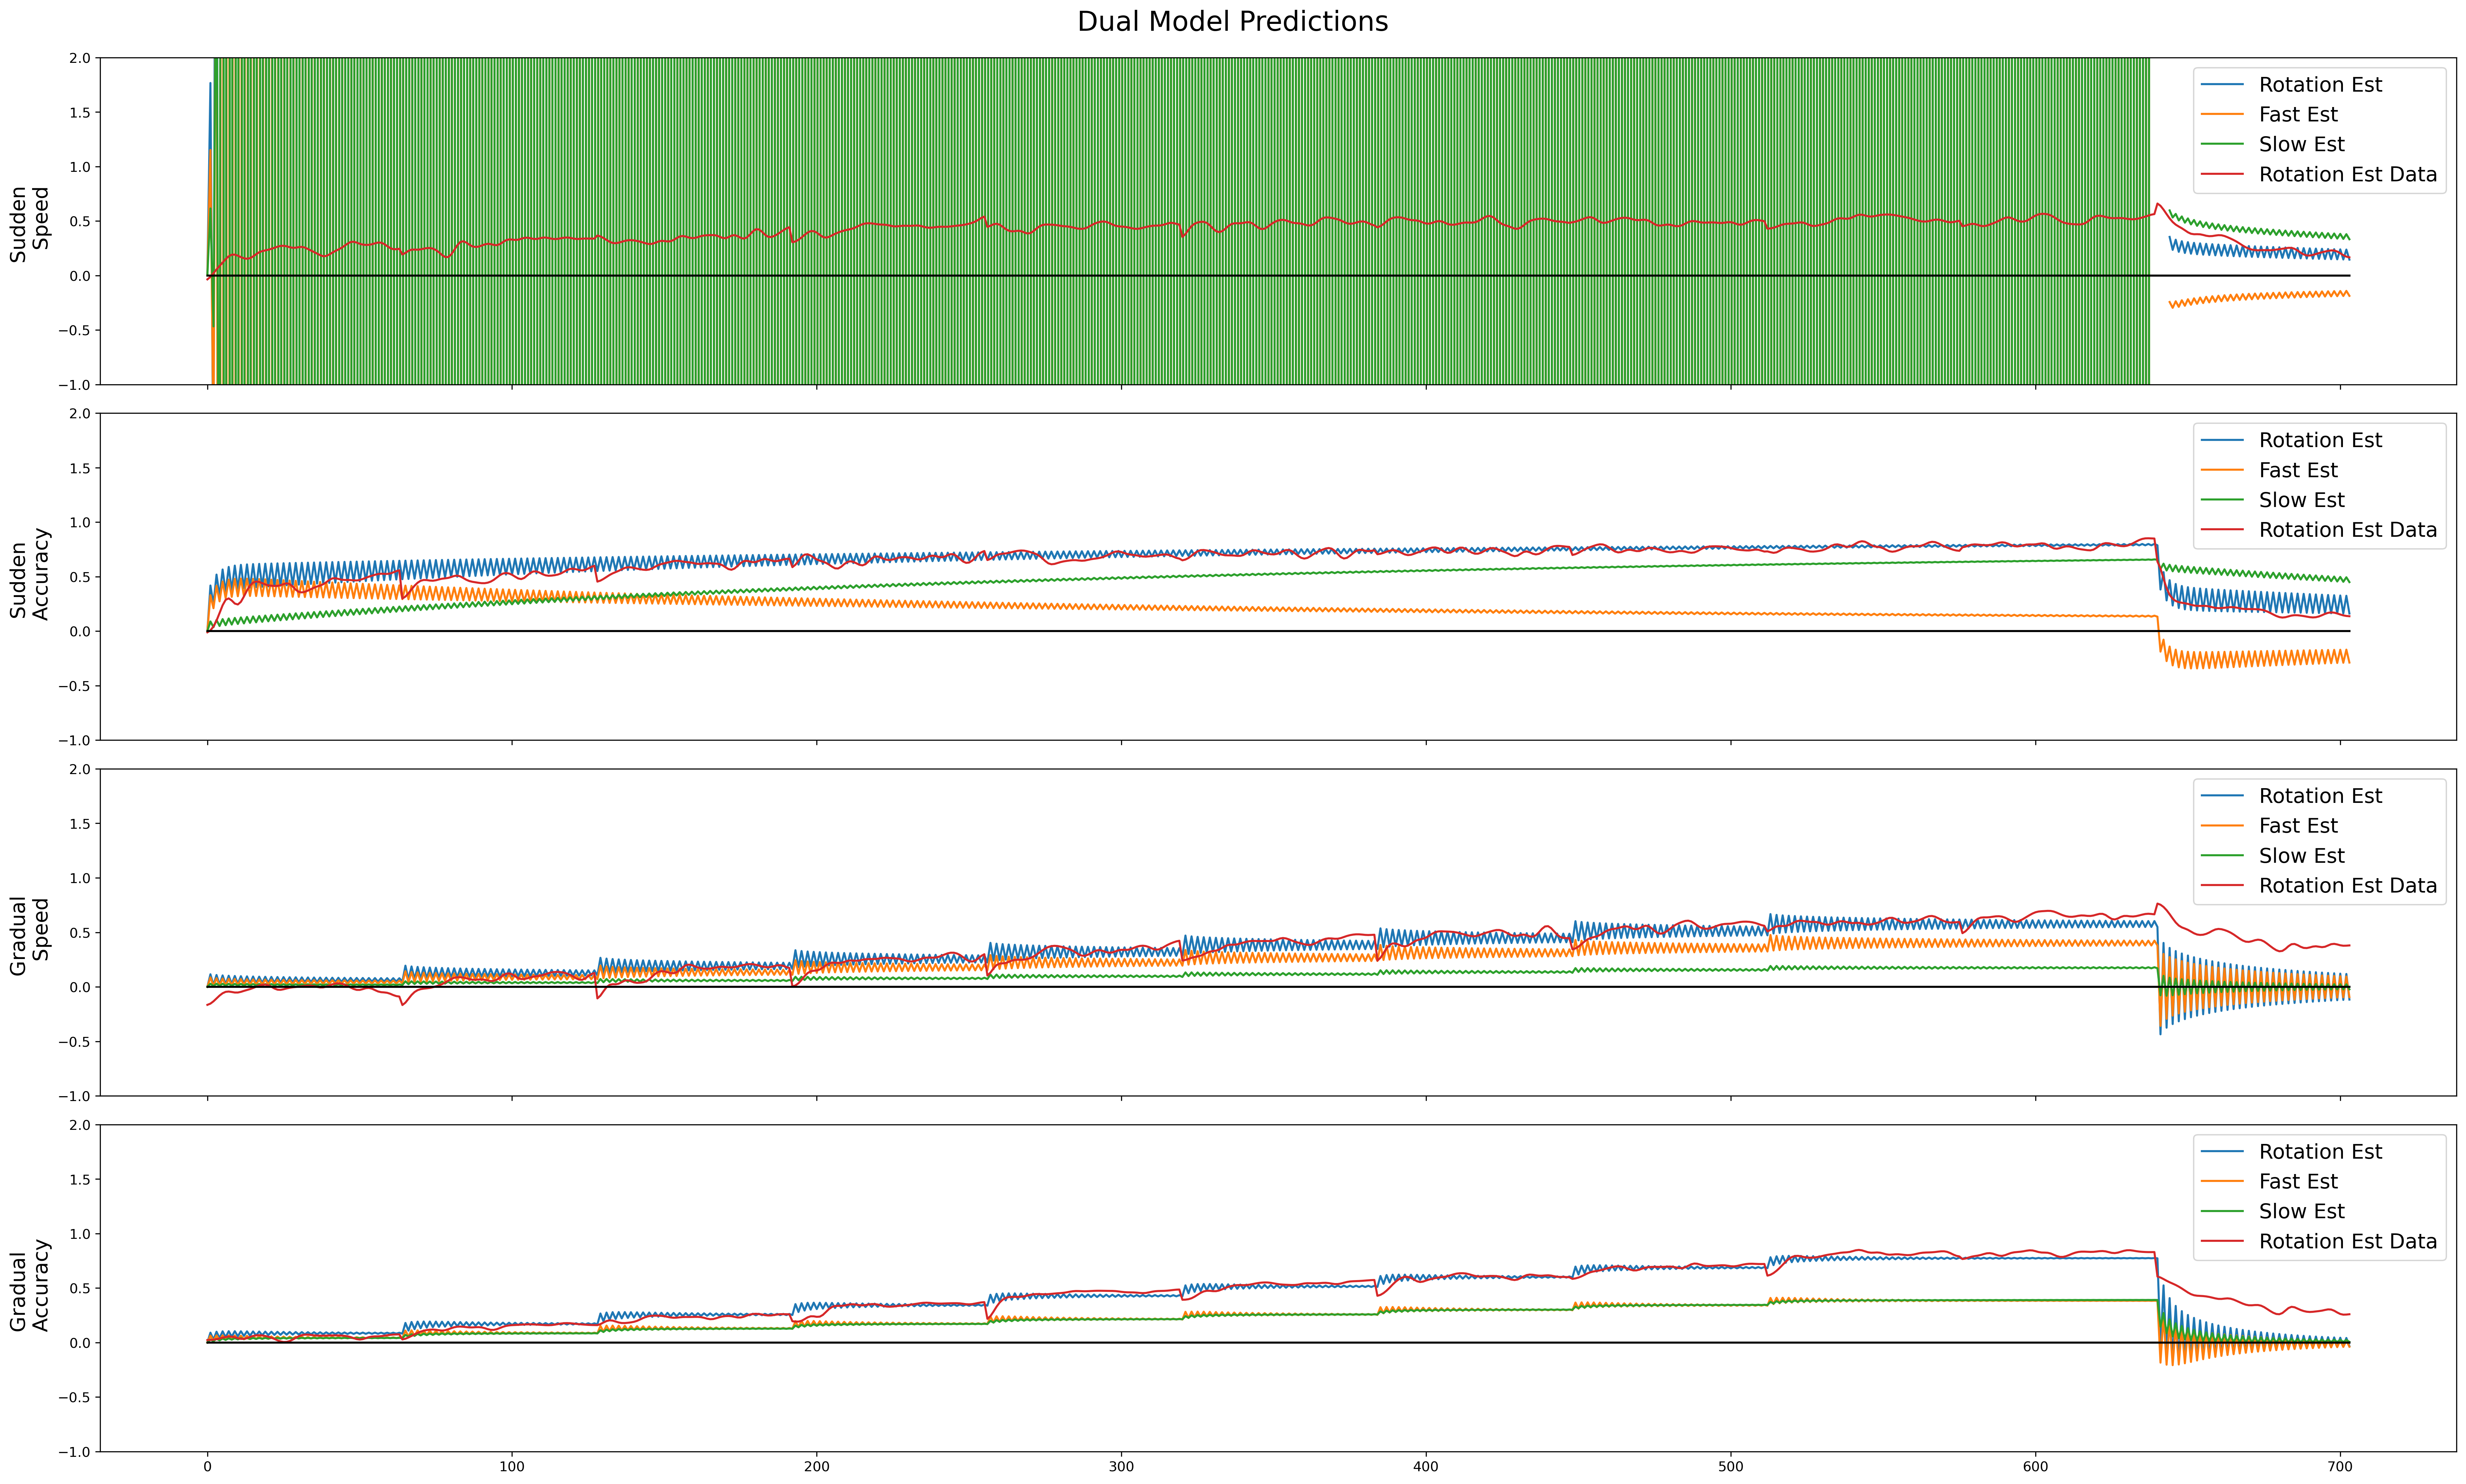

In [48]:
plot_data_vs_fits_dual(curvatures_smooth, fits_dual[:, 0], fits_dual[:, 1], fits_dual[:, 2], fits_dual[:, 3])

In [64]:
def plot_data_vs_fits_single(curvatures_smooth, A, B):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant] = model_sudden(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant] = model_gradual(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 2))
    legend_size = 15
    
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(1 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10/90.0 - csm[i+1]
            cs[576:640] = 1 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Single state model predictions', fontsize = 20)
    return corr_coef


array([ 0.56268264,  0.81992001, -0.0806547 ,  0.31005633,  0.1794694 ,
        0.36840385,  0.34844465, -0.17906427,  0.4603412 ,  0.25862883,
        0.38139191,  0.20343577,  0.76996325,  0.10821241,  0.70457749,
        0.40953746, -0.00522344,  0.52334946,  0.02799999,  0.19557494,
        0.733601  ,  0.85808318,  0.07533555,  0.50327458,  0.47581482,
        0.49630586,  0.04026884,  0.12327763,  0.35604979,  0.25325079,
        0.4020962 , -0.00539115,  0.1181538 ,  0.73722593,  0.20830192,
        0.4693675 ,  0.55401636,  0.36249793,  0.074944  ,  0.1362965 ,
        0.95734664,  0.48867557,  0.37674991,  0.64402753,  0.80720927,
        0.77842036,  0.46535007,  0.20089983,  0.1286729 ,  0.59265113,
       -0.09456673,  0.57857702,  0.51228921,  0.08420928,  0.09092951,
        0.38072567,  0.64469822,  0.47510632,  0.13411839,  0.19882073])

<Figure size 1440x720 with 0 Axes>

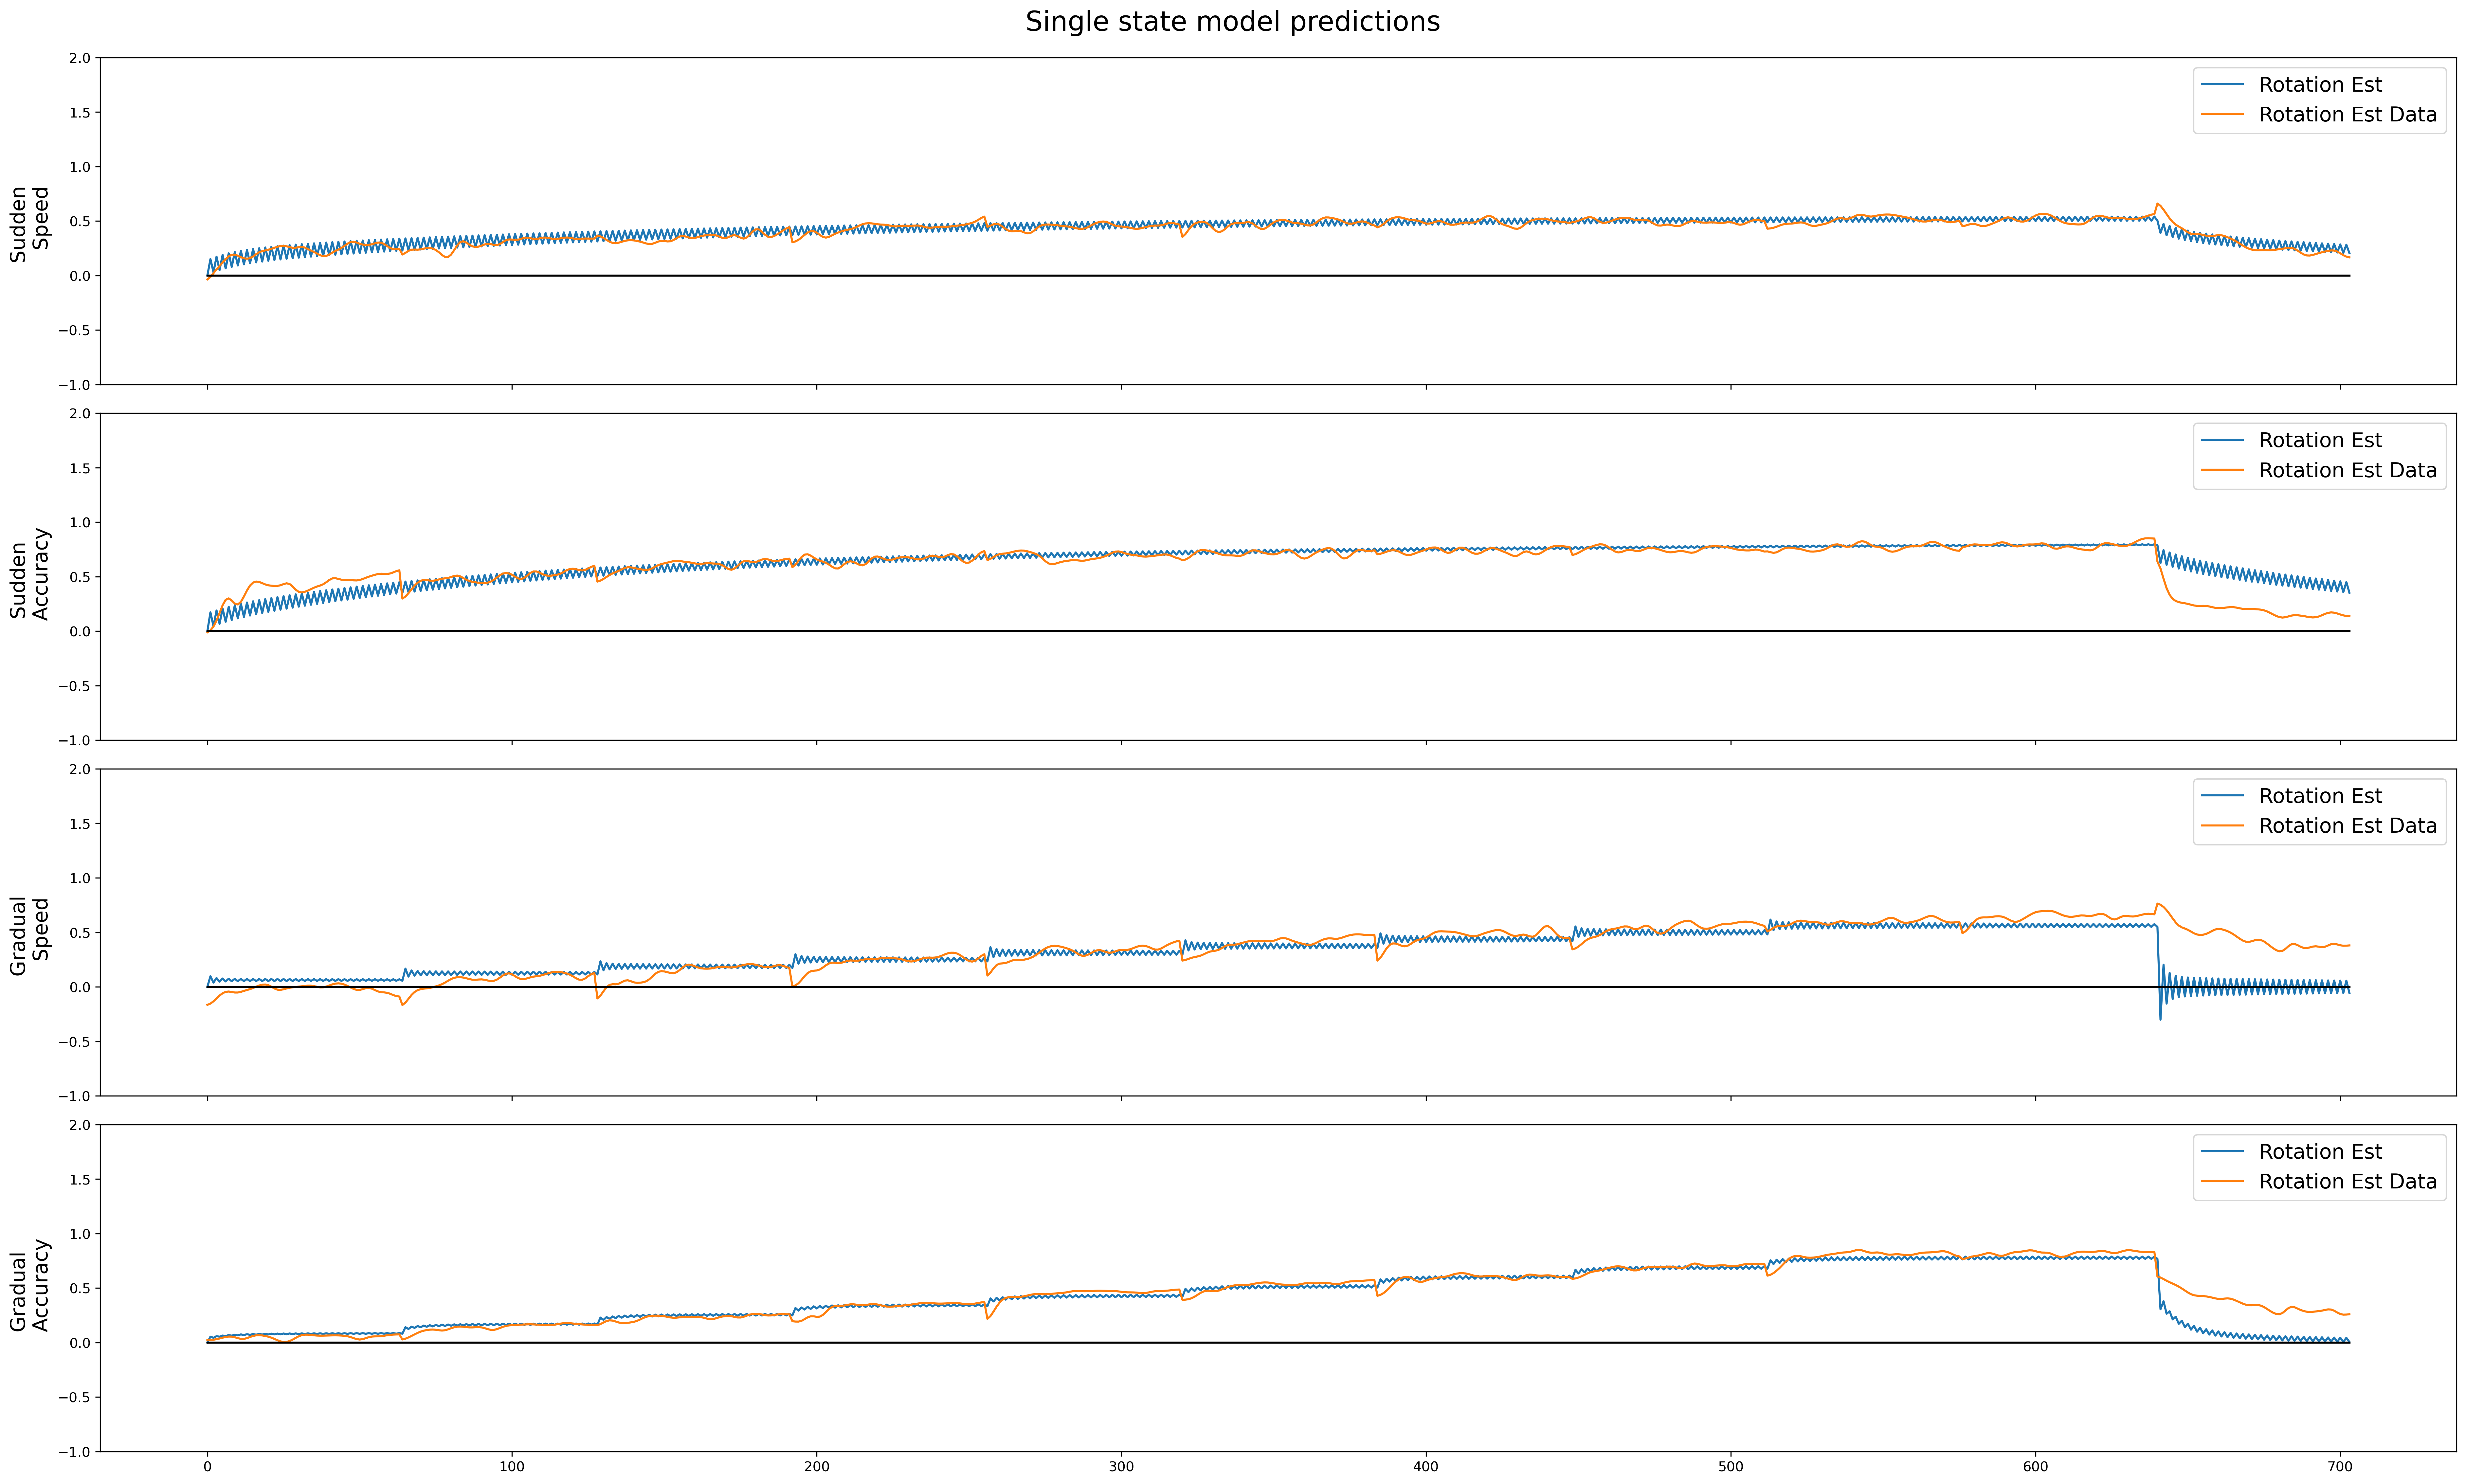

In [65]:
plot_data_vs_fits_single(curvatures_smooth, fits_single[:, 0], fits_single[:, 1])

Text(0, 0.5, 'Mean rmse')

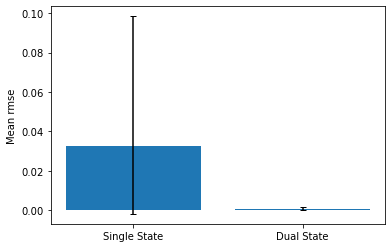

In [8]:
ci_single = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_single_model_recovery[0::4, -1]), scale=stat.sem(fits_single_model_recovery[0::4, -1]))
ci_dual = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_dual_model_recovery[:, -1]), scale=stat.sem(fits_dual_model_recovery[:, -1]))
plt.bar(('Single State', "Dual State"), [np.mean(fits_single_model_recovery[:, -1]), np.mean(fits_dual_model_recovery[:, -1])], yerr = ([ci_single[0], ci_dual[0]], [ci_single[1], ci_dual[1]]), capsize = 3)
plt.ylabel('Mean rmse')

In [45]:
stat.ttest_ind(fits_single[0::4, -1], fits_dual[0::4, -1])

Ttest_indResult(statistic=0.5169917253071281, pvalue=0.6092219397974497)

In [5]:
model_errors_dual = np.zeros((60, 704))
model_errors_single = np.zeros((60, 704))
for participant in range(60):
    if participant%4 == 0 or participant%4 == 1:
        model_errors_dual[participant] = dual_model_sudden(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_sudden(704, fits_single[participant][0], fits_single[participant][1])[0]

    else:
        model_errors_dual[participant] = dual_model_gradual(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_gradual(704, fits_single[participant][0], fits_single[participant][1])[0]
        

In [36]:
exp_quantile_points = np.quantile(model_errors_dual[0], [0.1, 0.3, 0.5, 0.7, 0.9])
exp_bin_counts = 704*np.array([0.1, 0.2, 0.2, 0.2, 0.2, 0.1])
q_counts = list()
for i in exp_quantile_points:
    q_counts.append(sum(np.ravel(curvatures_smooth[0][1:] < i)))
q_counts.insert(0, 0)
q_counts.append(704)

obs_bin_counts = np.diff(q_counts)
log_val = np.log(obs_bin_counts/exp_bin_counts)
gsq = 2 * sum(obs_bin_counts*log_val)

In [37]:
gsq

877.87792137375

In [68]:
fits_single[0, -1]

2060.0805279156484

In [63]:
mse_dual_groups = np.zeros(4)
mse_single_groups = np.zeros(4)
mse_dual_groups_recovery = np.zeros(4)
mse_single_groups_recovery = np.zeros(4)

for group in range(4):
    mse_dual_groups[group] = mean_squared_error(np.ravel(model_errors_dual[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_dual_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_single[group::4]), np.ravel(model_errors_dual_recovery[group::4]))
    
    mse_single_groups[group] = mean_squared_error(np.ravel(model_errors_single[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_single_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_dual[group::4]), np.ravel(model_errors_single_recovery[group::4]))
    
mse_duals = mean_squared_error(np.ravel(model_errors_dual[:, 640:]), np.ravel(curvatures_smooth[:, -1]))
mse_singles = mean_squared_error(np.ravel(model_errors_single[:, 640:]), np.ravel(curvatures_smooth[:, -1]))


In [85]:
AIC_single = np.zeros((4, 15))
BIC_single = np.zeros((4, 15))
AIC_dual = np.zeros((4, 15))
BIC_dual = np.zeros((4, 15))

mse_dual = np.zeros(60)
mse_single = np.zeros(60)


rss_dual = np.sum(model_errors_dual[:, :640] - np.reshape(curvatures_smooth[:, 1:-1], (60, 640)), axis = 1)**2
rss_single = np.sum(model_errors_single[:, :640] - np.reshape(curvatures_smooth[:, 1:-1], (60, 640)), axis = 1)**2

for group in range(4):
    AIC_dual[group] = 2*4 + 2*fits_dual[group::4, -1]
    BIC_dual[group] = np.log(704)*4 + fits_dual[group::4, -1]


    AIC_single[group]  = 2*2 + 2*fits_single[group::4, -1]
    BIC_single[group] = np.log(704)*2 + np.log(fits_single[group::4, -1])


In [91]:
np.sum(AIC_dual[3] < AIC_single[3])

7

In [49]:
np.sum(AIC_dual < AIC_single)

23

In [76]:
sum(fits_dual[:, -1])

738.2327615786689

In [77]:
sum(fits_single[:, -1])

826.2765964411491

In [46]:
np.shape(curvatures_smooth[:, -1])

(60, 64)

In [49]:
fits_single[48, -1]

50.24349663838527

In [29]:
r2_score(np.ravel(model_errors_dual), np.ravel(curvatures_smooth[:, 1:]))

-1.8435942015295161

In [30]:
r2_score(np.ravel(model_errors_single), np.ravel(curvatures_smooth[:, 1:]))

-1.7878687798910495

In [61]:
from scipy.ndimage import gaussian_filter1d
curvatures_smooth = gaussian_filter1d(curvatures, sigma = 2)
pickle.dump(curvatures_smooth, open('curvatures_smooth.pickle', 'wb'))